In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(0)


data = np.random.normal(loc = 5,scale = 1, size = 20)

def log_posterior(mu):
    log_likelihood = np.sum(norm.logpdf(data,loc = 5, scale = 1))
    log_prior = norm.logpdf(mu, loc = 0, scale = 10)

    return log_likelihood + log_prior




In [3]:
# Metropolis-Hastings Algorithm

mu_current = 0
proposal_sd = 0.5
samples = []
accepted = 0

for i in range(10000):
    mu_proposed = np.random.normal(mu_current, proposal_sd)

    log_r = log_posterior(mu_proposed) - log_posterior(mu_current)

    if np.log(np.random.rand()) < log_r:
        mu_current = mu_proposed
        accepted += 1

    samples.append(mu_current)

samples = np.array(samples)


burn_in = 1000
samples = samples[burn_in:]




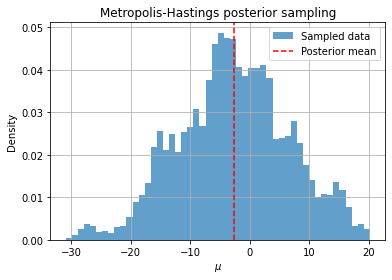

In [5]:
plt.hist(samples, bins = 50, density = True, alpha = 0.7, label = "Sampled data")
plt.axvline(np.mean(samples), color='red', linestyle='--', label='Posterior mean')
plt.xlabel(r'$\mu$')
plt.ylabel("Density")
plt.title("Metropolis-Hastings posterior sampling")
plt.legend()
plt.grid(True)
plt.show()